# 1. Crude death rate

Crude rates are calculated by dividing the total number of cases in a given time period by the total number of persons in the population. However, since I don't have the "number of deaths" and the "total population", it is also possible to calculate the crude rate by multiplying the age-specific death rates by the fraction of the population (population distribution) that they represent and then summing this up.

For Uganda crude death rate calcluation I would use Segi since it's have a high proportion of young people "and is considered appropriate for making comparisons with populations in Africa" (*'Ahmad OB, Boschi-Pinto C, Lopez AD, Murray CJ, Lozano R, Inoue M (2001). Age standardization of rates: a new WHO standard.'*)

While for calculating the crude death rate for the US, I would choose the Scandinavian distribution as it has a higher proportion of old people.

**Results:**
- Crude Death Rate US: 38.3 per 100,000 population
- Crude Death Rate Uganda: 23.3 per 100,000 population
- Crude mortality rate ratio: 1.64

# 2. Age-standardized death rate

Since "there is clearly no conceptual justification for choosing one standard over another" I would choose "WHO World Population Standard which is especially defined to reflect the average age structure of the worlds population expected over the next generation, from the year 2000 to 2025" (*'Ahmad OB, Boschi-Pinto C, Lopez AD, Murray CJ, Lozano R, Inoue M (2001). Age standardization of rates: a new WHO standard.'*)

**Results:**
- ASDR US: 28.4 per 100,000 population
- ASDR Uganda: 28.7 per 100,000 population
- Standardized rate ratio (SRR): 1.011

Standardized rate ratio of 1.011, less than the crude mortality rate ratio of 1.64, suggesting that much of the crude difference was due to confounding by age.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

population_distribution_df = pd.DataFrame({
    "Age group": ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"],
    "Scandinavian distribution": [8.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 6.00, 5.00, 4.00, 3.00, 2.00, 1.00, 1.00],
    "Segi distribution": [12.00, 10.00, 9.00, 9.00, 8.00, 8.00, 6.00, 6.00, 6.00, 6.00, 5.00, 4.00, 4.00, 3.00, 2.00, 1.00, 0.50, 0.50]
})

death_rates_df = pd.DataFrame({
    "Age group": ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"],
    "Death rate US": [0.04, 0.02, 0.02, 0.02, 0.06, 0.11, 0.29, 0.56, 1.42, 4.00, 14.13, 37.22, 66.48, 108.66, 213.10, 333.06, 491.10, 894.45],
    "Death rate Uganda": [0.40, 0.17, 0.07, 0.23, 0.38, 0.40, 0.75, 1.11, 2.04, 5.51, 13.26, 33.25, 69.62, 120.78, 229.88, 341.06, 529.31, 710.40]
})

merged_df = pd.merge(population_distribution_df, death_rates_df, on='Age group')
merged_df['Expected deaths US'] = (merged_df['Death rate US'] / 100) * merged_df['Scandinavian distribution']
merged_df['Expected deaths Uganda'] = (merged_df['Death rate Uganda'] / 100) * merged_df['Segi distribution']

crude_death_rate_us = merged_df['Expected deaths US'].sum()
crude_death_rate_uganda = merged_df['Expected deaths Uganda'].sum()

print(f"Crude Death Rate US: {crude_death_rate_us:.1f} per 100,000 population")
print(f"Crude Death Rate Uganda: {crude_death_rate_uganda:.1f} per 100,000 population")


Crude Death Rate US: 38.3 per 100,000 population
Crude Death Rate Uganda: 23.3 per 100,000 population


In [41]:
print(f"Crude mortality rate ratio: {crude_death_rate_us / crude_death_rate_uganda:.2f}")

Crude mortality rate ratio: 1.64


Expected deaths per 100,000 population:
              Expected deaths US  Expected deaths Uganda
WHO Standard                28.4                    28.7
Scandinavian                38.3                    38.1
Segi                        23.0                    23.3


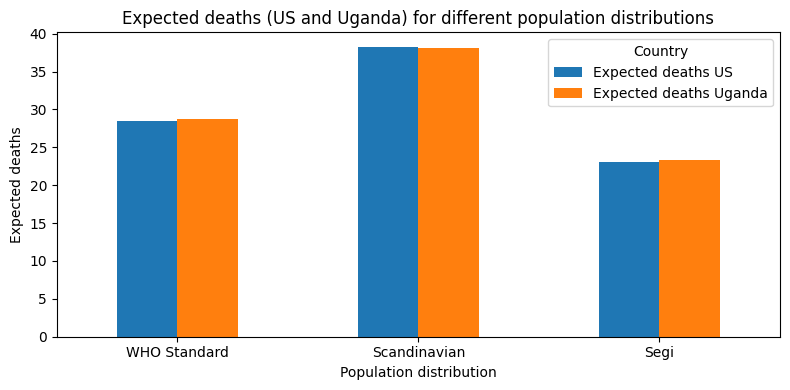

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

population_distribution_df = pd.DataFrame({
    "Age group": ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"],
    "WHO Standard distribution": [8.86, 8.69, 8.60, 8.47, 8.22, 7.93, 7.61, 7.15, 6.59, 6.04, 5.37, 4.55, 3.72, 2.96, 2.21, 1.52, 0.91, 0.63],
    "Scandinavian distribution": [8.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 6.00, 5.00, 4.00, 3.00, 2.00, 1.00, 1.00],
    "Segi distribution": [12.00, 10.00, 9.00, 9.00, 8.00, 8.00, 6.00, 6.00, 6.00, 6.00, 5.00, 4.00, 4.00, 3.00, 2.00, 1.00, 0.50, 0.50]
})

death_rates_df = pd.DataFrame({
    "Age group": ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"],
    "Death rate US": [0.04, 0.02, 0.02, 0.02, 0.06, 0.11, 0.29, 0.56, 1.42, 4.00, 14.13, 37.22, 66.48, 108.66, 213.10, 333.06, 491.10, 894.45],
    "Death rate Uganda": [0.40, 0.17, 0.07, 0.23, 0.38, 0.40, 0.75, 1.11, 2.04, 5.51, 13.26, 33.25, 69.62, 120.78, 229.88, 341.06, 529.31, 710.40]
})

def calculate_expected_deaths(population_distribution_df, death_rates_df, distribution_column):
    pd_df = population_distribution_df.copy()
    pd_df['Standard Population'] = pd_df[distribution_column] * 1000
    merged_df = pd.merge(pd_df, death_rates_df, on='Age group')
    merged_df['Expected deaths US'] = (merged_df['Death rate US'] / 100000) * merged_df['Standard Population']
    merged_df['Expected deaths Uganda'] = (merged_df['Death rate Uganda'] / 100000) * merged_df['Standard Population']
    return merged_df[['Expected deaths US', 'Expected deaths Uganda']].sum()

results = []
for distribution in ["WHO Standard distribution", "Scandinavian distribution", "Segi distribution"]:
    result = calculate_expected_deaths(population_distribution_df, death_rates_df, distribution)
    results.append(result)


results_df = pd.DataFrame(results, index=["WHO Standard", "Scandinavian", "Segi"])
results_df_rounded = results_df.round(1)

print("Expected deaths per 100,000 population:")
print(results_df_rounded)

# draw bar chart
fig, ax = plt.subplots(figsize=(8, 4))
results_df.plot(kind='bar', ax=ax)
ax.set_title('Expected deaths (US and Uganda) for different population distributions')
ax.set_ylabel('Expected deaths')
ax.set_xlabel('Population distribution')
plt.xticks(rotation=0)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [36]:
print("Standardized Rate Ratios (SRR)")

for distribution in results_df_rounded.index:
    death_rate_us = results_df_rounded.loc[distribution, 'Expected deaths US']
    death_rate_uganda = results_df_rounded.loc[distribution, 'Expected deaths Uganda']
    srr = death_rate_uganda / death_rate_us
    print(f"{distribution}: {srr:.3f}")

Standardized Rate Ratios (SRR)
WHO Standard: 1.011
Scandinavian: 0.995
Segi: 1.013
